In [186]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np

In [187]:
data = pd.read_csv('Data_Unbalanced.csv')
#data.head(100)

0    50
1     9
Name: Class, dtype: int64

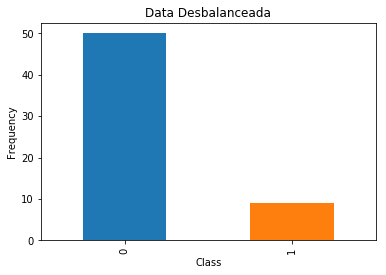

In [188]:
pd.value_counts(data['Class']).plot.bar()
plt.title('Data Desbalanceada')
plt.xlabel('Class')
plt.ylabel('Frequency')
data['Class'].value_counts()

In [198]:
X = np.array(data.iloc[:, data.columns != 'Class'])
y = np.array(data.iloc[:, data.columns == 'Class'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (59, 11)
Shape of y: (59, 1)


In [199]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (44, 11)
Number transactions y_train dataset:  (44, 1)
Number transactions X_test dataset:  (15, 11)
Number transactions y_test dataset:  (15, 1)


In [200]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))

#print(X_train_res)
#print(y_train_res)

Before OverSampling, counts of label '1': [8]
Before OverSampling, counts of label '0': [36] 

After OverSampling, the shape of train_X: (72, 11)
After OverSampling, the shape of train_y: (72,) 

After OverSampling, counts of label '1': 36
After OverSampling, counts of label '0': 36 



In [213]:
header = ['CARRERA', 'SEXO', 'EDAD', 'SECUNDARIA', 'NOTA_INGRESO', 'MODALIDAD_INGRESO', 'DEPENDIENTE', 
           'TOTAL_INGRESOS', 'PROMEDIO', 'AMONESTACIONES', 'TERCIO']
 
df = pd.DataFrame(X_train_res, columns=header)
df["Class"] = y_train_res
df.to_csv("Data_Balanced.csv", sep=",", index=False, float_format="%.6f")

In [214]:
#df.head(100)

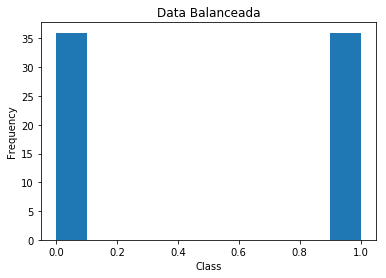

In [215]:
plt.title('Data Balanceada')
plt.hist(y_train_res)
plt.xlabel('Class')
plt.ylabel('Frequency') 
plt.show()
import sys

 

In [216]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())
clf.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    2.1s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:    2.2s finished


{'C': 2.0}

In [217]:
lr1 = LogisticRegression(C=4,penalty='l1', verbose=5)
lr1.fit(X_train_res, y_train_res.ravel())

[LibLinear]

LogisticRegression(C=4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=5, warm_start=False)

In [218]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 100.0%
Confusion matrix, without normalization
[[36  0]
 [ 0  8]]


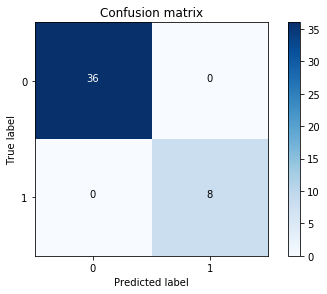

In [219]:
y_train_pre = lr1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset: 100.0%
Precision metric in the testing dataset: 100.0%
Confusion matrix, without normalization
[[13  1]
 [ 0  1]]


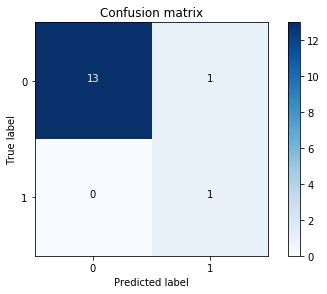

In [220]:
y_pre = lr1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [221]:
tmp = lr1.fit(X_train_res, y_train_res.ravel())

[LibLinear]

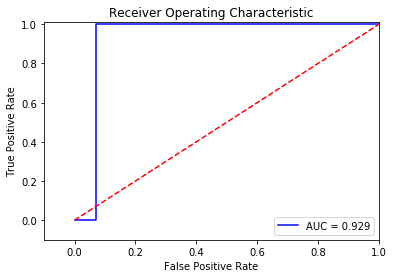

In [222]:
y_pred_sample_score = tmp.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [223]:
roc_auc

0.9285714285714286

1    36
0    36
Name: Class, dtype: int64

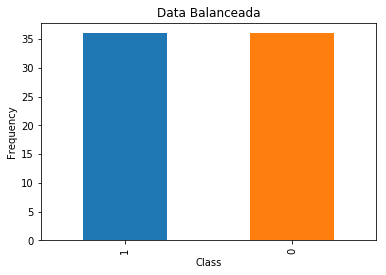

In [224]:
data = pd.read_csv('Data_Balanced.csv')

pd.value_counts(data['Class']).plot.bar()
plt.title('Data Balanceada')
plt.xlabel('Class')
plt.ylabel('Frequency')
data['Class'].value_counts()